In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



%matplotlib inline
SEED = 42

In [2]:

df = pd.read_csv('processed_transaction.csv')
df.head()

,accountNumber,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,customerId,enteredCVV,...,transactionDateTime_day,transactionDateTime_hour,transactionDateTime_minute,transactionDateTime_second,currentExpDate_year,currentExpDate_month,currentExpDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
0,733493772,3,5000.00,492,9184,0,5000.0,0.00,733493772,492,...,8,19,4,50,2020,4,1,2014,8,3
1,733493772,3,4888.67,492,9184,0,5000.0,111.33,733493772,492,...,9,22,32,39,2023,6,1,2014,8,3
2,733493772,3,4863.92,492,9184,0,5000.0,136.08,733493772,492,...,11,13,36,55,2027,12,1,2014,8,3
3,733493772,3,4676.52,492,9184,0,5000.0,323.48,733493772,492,...,11,22,47,46,2029,9,1,2014,8,3
4,733493772,3,4449.18,492,9184,0,5000.0,550.82,733493772,492,...,16,1,41,11,2024,10,1,2014,8,3


In [3]:
df.columns

Index(['accountNumber', 'acqCountry', 'availableMoney', 'cardCVV',
       'cardLast4Digits', 'cardPresent', 'creditLimit', 'currentBalance',
       'customerId', 'enteredCVV', 'expirationDateKeyInMatch', 'isFraud',
       'merchantCategoryCode', 'merchantCountryCode', 'merchantName',
       'posConditionCode', 'posEntryMode', 'transactionAmount',
       'transactionType', 'accountOpenDate_year', 'accountOpenDate_month',
       'accountOpenDate_day', 'transactionDateTime_year',
       'transactionDateTime_month', 'transactionDateTime_day',
       'transactionDateTime_hour', 'transactionDateTime_minute',
       'transactionDateTime_second', 'currentExpDate_year',
       'currentExpDate_month', 'currentExpDate_day',
       'dateOfLastAddressChange_year', 'dateOfLastAddressChange_month',
       'dateOfLastAddressChange_day'],
      dtype='object')

In [3]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']
# scale the features by standard scaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


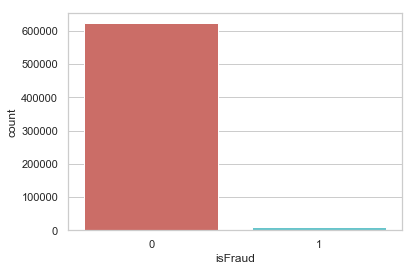

0    622954
1     10892
Name: isFraud, dtype: int64

In [5]:
sns.countplot(x='isFraud', data=df, palette='hls')
plt.show()
df['isFraud'].value_counts()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2502dac8>,
      dtype=object)

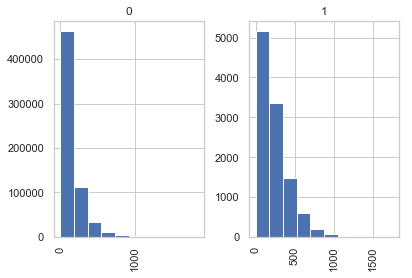

In [6]:
df['transactionAmount'].hist(by=df['isFraud'])

As we can see in the plot, most of the fraud transactions happen in low amount. it means there is not very high amount of fraud transactions. it's usaually because The bank would block these kind of high transactions easily for safety. so, it makes sense that the fraud transactions happen consistently in low prices. 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)